<a href="https://colab.research.google.com/github/AngeClementAkazan/Making-Prediction-with-Logistic-Regression-using-Tensorflow/blob/main/Prediction%20for%20Classification%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Logistic model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Load data
from sklearn.datasets import load_breast_cancer

dta=load_breast_cancer()
#Train/Test data
X_train, X_test, y_train, y_test=train_test_split(dta.data,
                            dta.target, test_size=0.2)

#Scaling

scler=StandardScaler()
X_train= scler.fit_transform(X_train) #We fit to get  the mean and standard deviation 
X_test=scler.transform(X_test)

#Creating model

N,D=X_train.shape
model= tf.keras.models.Sequential( [tf.keras.layers.Input(shape=(D,)), #the model an
                      tf.keras.layers.Dense(1, activation='sigmoid')]
                                 )
#Alternative way to do it
# model= tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(output_size, input_shape=(nb_col,), activation =''))

#Train/fit
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
md_ft= model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=150)


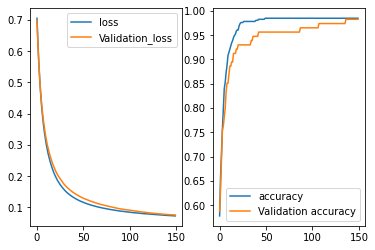

In [4]:

#Plotting loss and validation loss
plt.subplot(1,2,1)
plt.plot(md_ft.history["loss"], label = "loss")
plt.plot(md_ft.history["val_loss"], label= "Validation_loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(md_ft.history["accuracy"], label = "accuracy")
plt.plot(md_ft.history["val_accuracy"], label= "Validation accuracy")
plt.legend()
plt.show();

# 2. Making Prediction

In [ ]:
# Make prediction
#  The following result ouput p(y=1|x)=sigmoid(W^T X +B)
prd=model.predict(X_test)
# print(prd)
#  We must round the values of the sigmoid to make it either 0 or 1
#  The prediction prd is a 2-D array so we must flatten it to a 1-D array
import numpy as np
prd=np.round(prd).flatten()
print(prd)

4/4 [==============================] - 0s 5ms/step
[0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.]


In [ ]:
#Get the accuracy in two ways
#1
print("Manually Calculated Accuracy:",np.mean(prd==y_test))
print("Automatically Calculated Accuracy:",model.evaluate(X_test,y_test))

Manually Calculated Accuracy: 0.9649122807017544
4/4 [==============================] - 0s 5ms/step - loss: 0.1596 - accuracy: 0.9649
Automatically Calculated Accuracy: [0.15962645411491394, 0.9649122953414917]
